In [1]:
import requests, time
import matplotlib.pyplot as plt
import pandas as pd

### Calling synoptic for historic and current data

In [2]:
%store -r

In [3]:
mytoken = api_keys['synoptic']['public']

In [4]:
# # example 'latest' call
request = f'https://api.synopticdata.com/v2/stations/latest?stid=K1V4&within=60&token={mytoken}'
json = requests.get(request)
latest = json.json()

In [5]:
# # print example latest call
# latest['STATION'][0]['LATITUDE']
# latest['STATION'][0]['LONGITUDE']
# latest['STATION'][0]['ELEVATION']
latest['STATION'][0]

{'STATUS': 'ACTIVE',
 'MNET_ID': '1',
 'PERIOD_OF_RECORD': {'start': '2002-08-14T00:00:00Z',
  'end': '2020-05-11T21:54:00Z'},
 'ELEVATION': '696',
 'NAME': 'St. Johnsbury - Fairbanks',
 'STID': 'K1V4',
 'SENSOR_VARIABLES': {'air_temp': {'air_temp_value_1': {'period_of_record': {'start': '',
     'end': ''}}},
  'dew_point_temperature': {'dew_point_temperature_value_1d': {'derived_from': ['air_temp_value_1',
     'relative_humidity_value_1']},
   'dew_point_temperature_value_1': {'period_of_record': {'start': '',
     'end': ''}}},
  'pressure_tendency': {'pressure_tendency_value_1': {'period_of_record': {'start': '',
     'end': ''}}},
  'metar': {'metar_value_1': {'period_of_record': {'start': '', 'end': ''}}},
  'relative_humidity': {'relative_humidity_value_1': {'period_of_record': {'start': '',
     'end': ''}}},
  'sea_level_pressure': {'sea_level_pressure_value_1': {'period_of_record': {'start': '',
     'end': ''}},
   'sea_level_pressure_value_1d': {'derived_from': ['pressure_

In [6]:
# example timeseries call with all VT stations
request = f'https://api.synopticdata.com/v2/stations/timeseries?state=vt&start=201306011800&end=201306021215&token={mytoken}'
test = requests.get(request)
vt_dict = test.json()

In [7]:
# prints standard output

# vt_dict['STATION'][0]

In [8]:
# Stations which report solar radiation in real time
stations = []
for i in vt_dict['STATION']:
    if 'solar_radiation' in i['SENSOR_VARIABLES']:
        print(i['NAME'], i['STID'], sep='\n')
        stations.append(i['STID'])
        print('~~~')

MT. TABOR
DBYV1
~~~
ELMORE
EMRV1
~~~
ESSEX JUNCTION
ESXV1
~~~
NULHEGAN
NLHV1
~~~
CW1219 Worcester
C1219
~~~
LYE BROOK
LBKV1
~~~
CW1490 E.Dummerston
C1490
~~~
CW6904 S. Duxbury
C6904
~~~
CW8484 Westford
C8484
~~~
DW2416 Middlebury
D2416
~~~
DW3212 West Dover
D3212
~~~
DW4497 Milton
D4497
~~~
BRLNGTN2
A3114
~~~
RUTLAND
A3135
~~~
Burlington
A3149
~~~
Underhill
A3150
~~~
DW7178 Townshend
D7178
~~~
DW8397 Weston
D8397
~~~
DW9125 Alburg
D9125
~~~
EW0814 Lunenburg
E0814
~~~


In [9]:
time_tuple = time.strptime('2017-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
start_time_epoch = time.mktime(time_tuple)
time_tuple = time.strptime('2020-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
end_time_epoch = time.mktime(time_tuple)
start_time = 200208290000
end_time = 202005010000

In [10]:
# currently starts at 2017 - in future update stations list with init station activation date for most complete data set
train_set = {}
for st in stations:
    request = f'https://api.synopticdata.com/v2/stations/timeseries?stid={stations[0]}&start={start_time}&end={end_time}&token={mytoken}'
    train_set[st] = requests.get(request).json()
    break

In [11]:
# stations
train_set.keys()

dict_keys(['DBYV1'])

In [12]:
# # print synopitc's qc check
# synoptic finds no flags

# for st in train_set:
#     print(train_set[st]['QC_SUMMARY'], end="\n~~~\n")

In [13]:
# sensor data beings 2002
for st in train_set:
    print(train_set[st]['STATION'][0]['PERIOD_OF_RECORD'])

{'start': '2002-08-29T00:00:00Z', 'end': '2020-05-07T03:14:00Z'}


In [14]:
# # features recorded from each station look uniform throughout
# for st in train_set:
#     print(st, end='\n~~~\n')
#     print(train_set[st]['STATION'][0]['SENSOR_VARIABLES'], end='\n\n')


In [15]:
import pandas as pd

In [16]:
# dataframe from dict 'SENSOR_VARIABLES'
train_dfs = {}
for st in train_set:
    train_dfs[st] = pd.DataFrame.from_dict(train_set[st]['STATION'][0]['OBSERVATIONS'])
    train_dfs[st].set_index(['date_time'], inplace = True)
    train_dfs[st].index = pd.to_datetime(train_dfs[st].index)
    break
print(train_dfs[st].shape)
train_dfs[st].head(24)

(146031, 15)


,wind_speed_set_1,wind_cardinal_direction_set_1d,volt_set_1,wind_gust_set_1,snow_interval_set_1,dew_point_temperature_set_1d,peak_wind_direction_set_1,wind_chill_set_1d,precip_accum_set_1,heat_index_set_1d,wind_direction_set_1,relative_humidity_set_1,solar_radiation_set_1,peak_wind_speed_set_1,air_temp_set_1
date_time,,,,,,,,,,,,,,,
2002-08-29 21:20:00+00:00,1.79,NNW,NaN,4.92,NaN,11.39,NaN,NaN,14.478,NaN,330.0,85.0,39.0,NaN,13.89
2002-08-29 22:20:00+00:00,1.79,N,NaN,4.92,NaN,10.84,NaN,NaN,17.526,NaN,350.0,82.0,42.0,NaN,13.89
2002-08-29 23:20:00+00:00,1.34,NNE,NaN,3.58,NaN,10.65,NaN,NaN,21.082,NaN,20.0,81.0,10.0,NaN,13.89
2002-08-30 00:20:00+00:00,0.90,ENE,NaN,4.02,NaN,10.84,NaN,NaN,22.860,NaN,60.0,82.0,0.0,NaN,13.89
2002-08-30 01:20:00+00:00,0.90,NNE,NaN,2.68,NaN,10.29,NaN,NaN,24.892,NaN,30.0,82.0,0.0,NaN,13.33
2002-08-30 02:20:00+00:00,0.90,NNE,NaN,2.23,NaN,10.29,NaN,NaN,25.146,NaN,20.0,82.0,0.0,NaN,13.33
2002-08-30 03:20:00+00:00,0.90,N,NaN,2.68,NaN,10.29,NaN,NaN,25.400,NaN,10.0,82.0,0.0,NaN,13.33
2002-08-30 04:20:00+00:00,0.45,SSW,NaN,1.34,NaN,10.48,NaN,NaN,25.400,NaN,200.0,83.0,0.0,NaN,13.33
2002-08-30 05:20:00+00:00,0.00,NNW,NaN,0.90,NaN,10.48,NaN,NaN,25.400,NaN,330.0,83.0,0.0,NaN,13.33


In [17]:
train_dfs[st].describe()

,wind_speed_set_1,volt_set_1,wind_gust_set_1,snow_interval_set_1,dew_point_temperature_set_1d,peak_wind_direction_set_1,wind_chill_set_1d,precip_accum_set_1,heat_index_set_1d,wind_direction_set_1,relative_humidity_set_1,solar_radiation_set_1,peak_wind_speed_set_1,air_temp_set_1
count,144849.000000,125726.000000,144811.000000,1.0,144641.000000,125864.000000,11886.000000,146007.000000,7008.000000,133407.000000,144852.000000,145931.000000,125862.000000,145988.000000
mean,1.411357,13.330633,3.922516,0.0,3.421384,185.834878,-4.286090,802.202082,29.929806,181.860787,74.665576,142.032653,3.901302,8.394222
std,1.103925,0.515511,2.579977,NaN,11.243235,103.395348,6.684318,673.288658,2.772396,105.752801,22.121724,238.789383,2.568321,11.220808
min,0.000000,0.000000,0.000000,0.0,-39.050000,0.000000,-33.740000,0.000000,25.390000,0.000000,0.000000,0.000000,0.000000,-32.780000
25%,0.450000,13.100000,1.790000,0.0,-4.520000,91.000000,-8.340000,256.032000,27.860000,89.000000,58.000000,0.000000,1.790000,0.000000
50%,1.340000,13.200000,3.580000,0.0,4.000000,204.000000,-2.940000,621.538000,29.270000,190.000000,79.000000,4.000000,3.580000,8.330000
75%,2.230000,13.800000,5.370000,0.0,12.980000,266.000000,0.760000,1103.630000,31.332500,265.000000,95.000000,187.000000,5.370000,17.220000
max,11.170000,15.900000,26.820000,0.0,26.680000,360.000000,5.400000,2538.730000,45.540000,360.000000,100.000000,1186.000000,26.820000,37.220000


In [18]:
sunrise = train_dfs[st].index.time[12]

In [19]:
sunset = train_dfs[st].index.time[22]

In [20]:
daylight = train_dfs[st].loc[(train_dfs[st].index.time > sunrise) & (train_dfs[st].index.time < sunset)]
daylight.shape

(65640, 15)

In [21]:
daylight.isna().sum()

wind_speed_set_1                    509
wind_cardinal_direction_set_1d     4202
volt_set_1                         8452
wind_gust_set_1                     530
snow_interval_set_1               65639
dew_point_temperature_set_1d        606
peak_wind_direction_set_1          8392
wind_chill_set_1d                 59061
precip_accum_set_1                   14
heat_index_set_1d                 60422
wind_direction_set_1               4202
relative_humidity_set_1             507
solar_radiation_set_1                50
peak_wind_speed_set_1              8393
air_temp_set_1                       22
dtype: int64

In [22]:
daylight.describe()

,wind_speed_set_1,volt_set_1,wind_gust_set_1,snow_interval_set_1,dew_point_temperature_set_1d,peak_wind_direction_set_1,wind_chill_set_1d,precip_accum_set_1,heat_index_set_1d,wind_direction_set_1,relative_humidity_set_1,solar_radiation_set_1,peak_wind_speed_set_1,air_temp_set_1
count,65131.000000,57188.000000,65110.000000,1.0,65034.000000,57248.000000,6579.000000,65626.000000,5218.000000,61438.000000,65133.000000,65590.000000,57247.000000,65618.000000
mean,1.657972,13.365307,4.360432,0.0,3.581729,188.445121,-4.169027,803.291472,29.990033,187.988574,68.653586,273.103140,4.359070,9.976398
std,1.137658,0.543935,2.608072,NaN,11.454261,102.959017,6.722926,674.269891,2.791594,105.908084,22.672233,286.233595,2.596414,11.776733
min,0.000000,0.000000,0.000000,0.0,-34.840000,0.000000,-33.740000,0.000000,25.390000,0.000000,0.000000,0.000000,0.000000,-32.780000
25%,0.900000,13.100000,2.230000,0.0,-4.670000,94.000000,-8.300000,256.032000,27.890000,95.000000,51.000000,26.000000,2.230000,1.110000
50%,1.340000,13.300000,4.020000,0.0,4.190000,209.000000,-2.940000,623.570000,29.360000,200.000000,70.000000,162.000000,4.020000,10.000000
75%,2.230000,13.800000,5.810000,0.0,13.330000,266.000000,1.070000,1108.646500,31.460000,271.000000,89.000000,464.000000,5.810000,19.440000
max,11.170000,15.900000,24.590000,0.0,26.420000,360.000000,5.400000,2534.412000,44.790000,360.000000,100.000000,1186.000000,24.590000,36.670000


In [23]:
daylight = daylight[daylight['solar_radiation_set_1'].notna()]

In [24]:
daylight = daylight.drop(['heat_index_set_1d', 'wind_chill_set_1d', 'wind_cardinal_direction_set_1d', 
                          'snow_interval_set_1', 'volt_set_1', 'peak_wind_direction_set_1', 'peak_wind_speed_set_1'], axis = 1)

# consider this -  leaving wind direction and filling nans with 'nowind' all strings later converted to classes

In [25]:
# windspeed on wind direction nans is consistantly 0 so we can assign a new place holder value (-1) but that will throw off the scalar value of the feature
# could assign them the mode as potentially light winds are most common and always come form the same direction (further inspection needed/could be different for other cases)
# wind direction could be dropped entirely and considered a noisy column
#  could front fill and assume that there has been no change in wind direction since last observation ## current method

# daylight[daylight.isna().any(axis=1)].head()

In [26]:
# # seems most solar nans are also other sensor nans
# # filling this data might be useful when it comes time to iteratively prepare all datasets

daylight['wind_direction_set_1'].ffill(inplace=True) # could interpolate or ffill
# daylight['air_temp_set_1'] = daylight['air_temp_set_1'].interpolate(method='time', inplace = True)
# daylight['wind_speed_set_1'] = daylight['wind_speed_set_1'].interpolate(method='time', inplace = True)
# daylight['dew_point_temperature_set_1d'] = daylight['dew_point_temperature_set_1d'].interpolate(method='time', inplace = True)
# daylight['wind_gust_set_1'] = daylight['wind_gust_set_1'].ffill(inplace = True)

In [27]:
for col in daylight.columns:
    if daylight[col].isna().any() == True:
        daylight[col].ffill(inplace=True)

In [28]:
daylight.isna().sum()

wind_speed_set_1                0
wind_gust_set_1                 0
dew_point_temperature_set_1d    0
precip_accum_set_1              0
wind_direction_set_1            0
relative_humidity_set_1         0
solar_radiation_set_1           0
air_temp_set_1                  0
dtype: int64

In [29]:
daylight.describe()

,wind_speed_set_1,wind_gust_set_1,dew_point_temperature_set_1d,precip_accum_set_1,wind_direction_set_1,relative_humidity_set_1,solar_radiation_set_1,air_temp_set_1
count,65590.000000,65590.000000,65590.000000,65590.000000,65590.000000,65590.000000,65590.000000,65590.000000
mean,1.662076,4.357539,3.520398,803.336728,187.693292,68.712914,273.103140,9.977303
std,1.134806,2.599130,11.460060,674.274283,105.547125,22.602353,286.233595,11.777713
min,0.000000,0.000000,-34.840000,0.000000,0.000000,0.000000,0.000000,-32.780000
25%,0.900000,2.230000,-4.910000,256.032000,95.000000,51.000000,26.000000,1.110000
50%,1.340000,4.020000,4.080000,623.570000,200.000000,70.000000,162.000000,10.000000
75%,2.230000,5.810000,13.330000,1108.710000,270.000000,89.000000,464.000000,19.440000
max,11.170000,24.590000,26.420000,2534.412000,360.000000,100.000000,1186.000000,36.670000


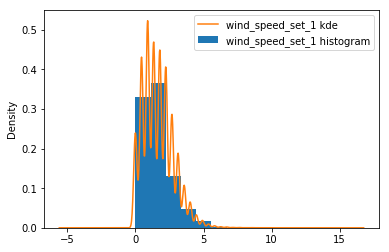

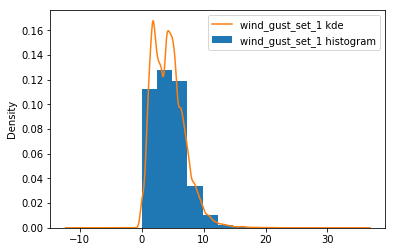

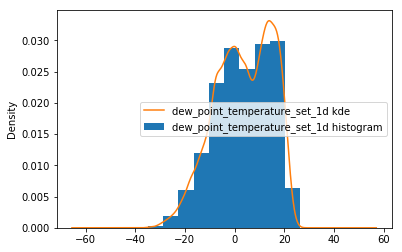

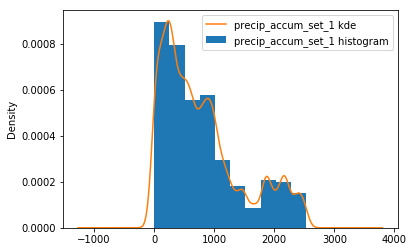

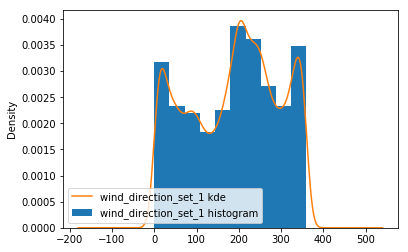

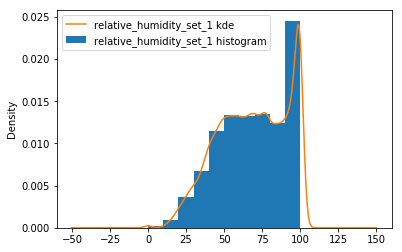

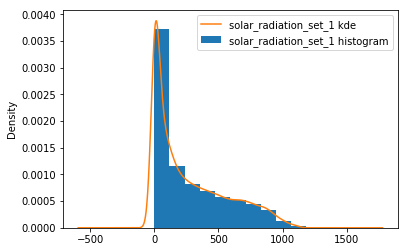

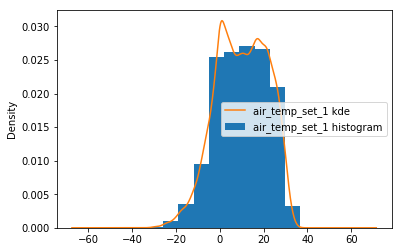

In [30]:
for column in daylight:
    daylight[column].plot.hist(density=True, label = column+' histogram')
    daylight[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

GHI looks to be skewed / we could undersample from those entries

# Get Clear Sky Benchmark

In [31]:
# time_tuple = time.strptime('2017-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
# start_time_epoch = time.mktime(time_tuple)
# time_tuple = time.strptime('2020-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
# end_time_epoch = time.mktime(time_tuple)
# start_time = 201701010000
# end_time = 202001010000
# start_time_stirng = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(start_time_epoch))
# end_time_string = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(end_time_epoch))

In [32]:
import numpy as np 
from pvlib import solarposition

In [33]:
from pvlib import clearsky, atmosphere, irradiance 
from pvlib.location import Location


def create_locobject(synoptic_return):
    """
    populates a location object with the pvlib location object with data supplied by the counties_dict
    Input: (location_dict)
    Output: dictionary of location objects
    """
    local = synoptic_return['STATION'][0]['NAME']
    lat = int(round(float(synoptic_return['STATION'][0]['LATITUDE']),0))
    lon = int(round(float(synoptic_return['STATION'][0]['LONGITUDE']),0))
    alt = int(synoptic_return['STATION'][0]['ELEVATION'])
    location = Location(latitude=lat,
                            longitude=lon,
                            name = local, 
                            altitude=alt, tz='EST')

    print(f"location objects for {local} created")
    return location

def get_solpos(location_obj, times):
    '''
    this shouldn't be a problem
    '''
    
    time_list = times #list(times.apply(lambda x : x.split('+')[0]))
    print(time_list[0], type(time_list[0]))
    print(location_obj)
    solpos = location_obj.get_solarposition(time_list, temperature = 14) # temp is an optional argument and has little effect on the result
    return solpos


def calc_clearsky(train_set, train_dfs, debug = True):
    """
    calculates the clearsky irradiance given the times for the forecast
    todo - update precipitable water and aod@700 to make for a more fitted prediction. otherwise this data can be stored on db
    """
    cs_dict = {}
    for station in train_set.keys():

        print('entered loop')
        #create dict to store
        cs_dict[station] = {}
        
        #create timeseries from index
        times = pd.Series(train_dfs[station].index.astype(str))
        
        #crete location object
        location_obj = create_locobject(train_set[station])
        
        #get solpos and join on train set
        solpos = get_solpos(location_obj, times)
        train_dfs[station] = train_dfs[station].join(solpos, how='outer')
        print(train_dfs[station].columns)
        
        precipitable_water = 1 # todo assumption move to times
        pressure = atmosphere.alt2pres(location_obj.altitude)
#         aod700nm = atmosphere.angstrom_aod_at_lambda(1.2, 1240, alpha_exponent, 700) #alternate function #define alpha exponent
        aod700 = float(0.1)

        for idx, time in enumerate(times):
            dni_extra = irradiance.get_extra_radiation(pd.to_datetime(time))
            apparent_elevation = float(solpos['apparent_elevation'][idx])
            
            #returns an ordered dictionary
            od = clearsky.simplified_solis(apparent_elevation, aod700, precipitable_water,
                                          pressure, dni_extra)
            keys = list(od.keys())
            for key in keys:
                if idx == 0:
                    cs_dict[station][key] = []
                val = od[key]
                cs_dict[station][key].append(float(val))
        
        cs_dict[station] = pd.DataFrame.from_dict(cs_dict[station]) #{}
        cs_dict[station].index = times
        train_dfs[station] = train_dfs[station].join(cs_dict[station], how='outer')
        print(f'{station} has {cs_dict.keys()}')
        if debug:
            break
#     print(f'cs for {len(cs_dict.keys)} locations complete')
    return cs_dict, train_dfs

In [34]:
daylight_container = {'DBYV1' : daylight}

In [35]:
cs_dict, daylight_container = calc_clearsky(train_set, daylight_container)

entered loop
location objects for MT. TABOR created
2002-08-30 10:20:00+00:00 <class 'str'>
Location: 
  name: MT. TABOR
  latitude: 43
  longitude: -73
  altitude: 668
  tz: EST
Index(['wind_speed_set_1', 'wind_gust_set_1', 'dew_point_temperature_set_1d',
       'precip_accum_set_1', 'wind_direction_set_1', 'relative_humidity_set_1',
       'solar_radiation_set_1', 'air_temp_set_1', 'apparent_zenith', 'zenith',
       'apparent_elevation', 'elevation', 'azimuth', 'equation_of_time'],
      dtype='object')
DBYV1 has dict_keys(['DBYV1'])


In [36]:
daylight_container['DBYV1'].columns

Index(['wind_speed_set_1', 'wind_gust_set_1', 'dew_point_temperature_set_1d',
       'precip_accum_set_1', 'wind_direction_set_1', 'relative_humidity_set_1',
       'solar_radiation_set_1', 'air_temp_set_1', 'apparent_zenith', 'zenith',
       'apparent_elevation', 'elevation', 'azimuth', 'equation_of_time', 'ghi',
       'dni', 'dhi'],
      dtype='object')

# Feature Engineering
and a break for visuals

In [37]:
train_set.keys()

dict_keys(['DBYV1'])

In [38]:
daylight_container.keys()

dict_keys(['DBYV1'])

In [39]:
daylight_container['DBYV1'].shape

(65590, 17)

In [40]:
#todo 
#consider class features (wind direction as class)
# consider binning ghi as class (0,250,500,and up)
# consider a log transformation on GHI
# minx max scale all scalar features

# list of fnon-normal features 'solar_radiation_set_1' 'wind_speed_set_1' 'peak_wind_speed_set_1'
# these features aare not so unbalanced to consider log transform

In [41]:
# remove faulty readings and slippery dark time hours
normalizing = daylight_container['DBYV1'][daylight_container['DBYV1']['solar_radiation_set_1'] > 0]

In [42]:
normalizing.describe()

,wind_speed_set_1,wind_gust_set_1,dew_point_temperature_set_1d,precip_accum_set_1,wind_direction_set_1,relative_humidity_set_1,solar_radiation_set_1,air_temp_set_1,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time,ghi,dni,dhi
count,57813.000000,57813.000000,57813.000000,57813.000000,57813.000000,57813.000000,57813.000000,57813.000000,57813.000000,57813.000000,57813.000000,57813.000000,57813.000000,57813.000000,57813.000000,57813.000000,57813.000000
mean,1.709469,4.454233,4.579850,804.814836,189.538910,66.816477,309.840952,11.487329,56.479305,56.518663,33.520695,33.481337,159.643479,0.208089,515.923245,746.928678,89.603027
std,1.127934,2.571819,11.283879,676.106638,105.437364,22.720459,285.601047,11.273371,17.978133,18.011409,17.978133,18.011409,53.358844,8.417602,274.832724,185.485451,25.316942
min,0.000000,0.000000,-34.840000,0.000000,0.000000,0.000000,0.070000,-32.780000,19.991255,19.996863,-18.409105,-18.409105,66.067670,-14.240613,0.000000,0.000000,0.000000
25%,0.900000,2.230000,-3.610000,269.240000,98.000000,49.000000,61.000000,2.780000,42.153062,42.167029,19.655940,19.613349,114.670546,-5.917253,298.069242,681.760885,76.186363
50%,1.790000,4.470000,5.670000,614.172000,203.000000,67.000000,218.000000,12.220000,58.708524,58.733813,31.291476,31.266187,156.683141,-0.335638,506.448450,805.447829,95.033291
75%,2.230000,5.810000,14.060000,1121.664000,272.000000,87.000000,511.000000,20.560000,70.344060,70.386651,47.846938,47.832971,207.401347,4.056693,757.950618,881.942365,110.143725
max,11.170000,24.590000,26.420000,2534.412000,360.000000,100.000000,1186.000000,36.670000,108.409105,108.409105,70.008745,70.003137,261.174432,16.456869,980.905682,926.556710,120.405147


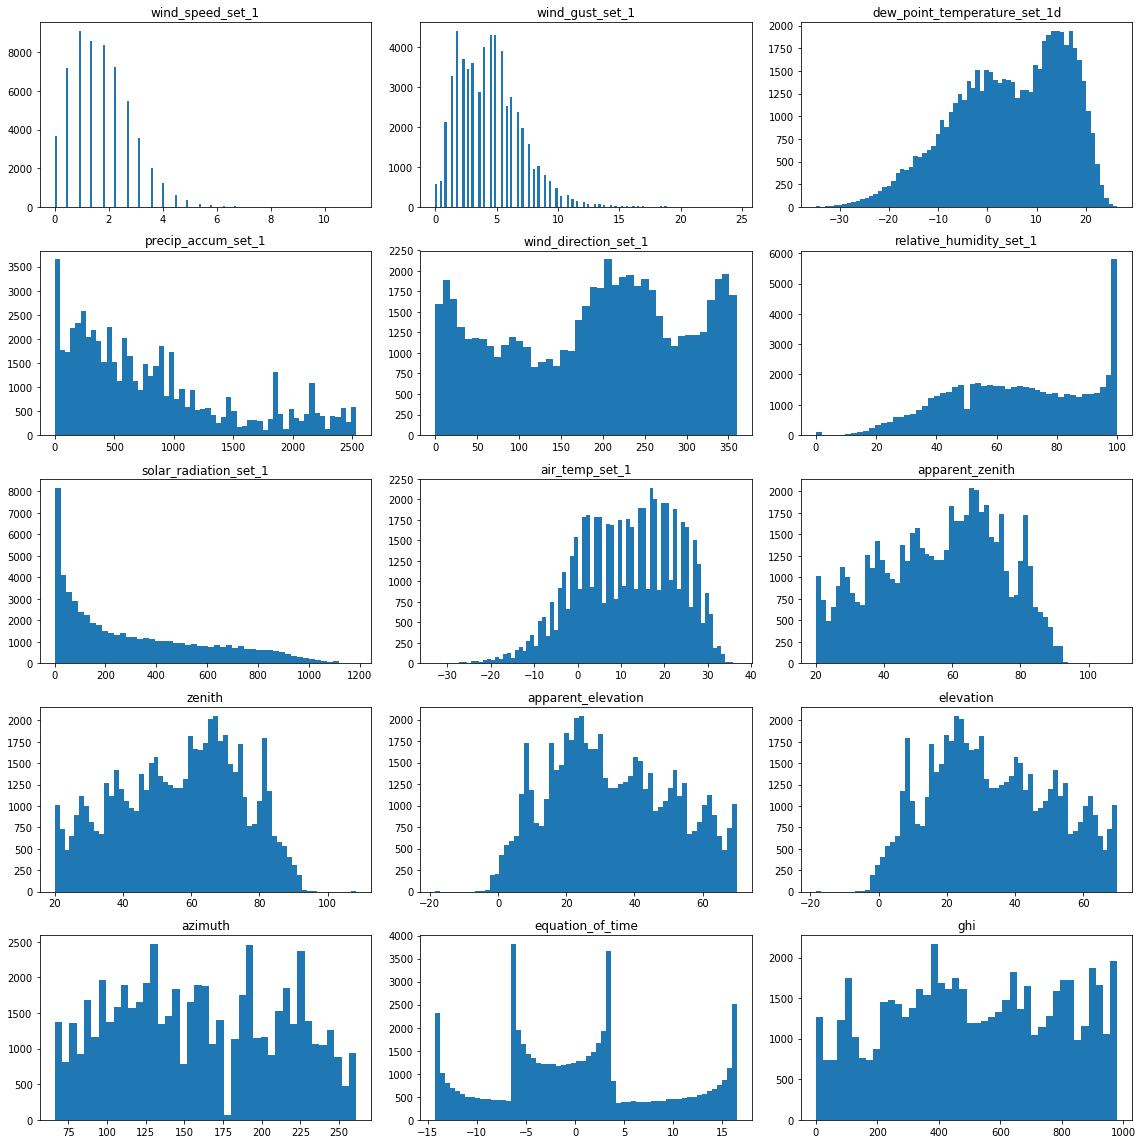

In [43]:
fig, axes = plt.subplots(nrows=(normalizing.shape[1] // 3), ncols=3, figsize=(16,16))

categoricals = [column for column in normalizing.columns if column != 'Id']

for col, ax in zip(categoricals, axes.flatten()):
    ax.hist(normalizing[col], bins='auto')
    ax.set_title(col)
    
fig.tight_layout()

In [44]:
normalizing.head(1)

,wind_speed_set_1,wind_gust_set_1,dew_point_temperature_set_1d,precip_accum_set_1,wind_direction_set_1,relative_humidity_set_1,solar_radiation_set_1,air_temp_set_1,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time,ghi,dni,dhi
date_time,,,,,,,,,,,,,,,,,
2002-08-30 11:20:00+00:00,0.45,1.79,9.92,25.654,350.0,80.0,34.0,13.33,78.83943,78.914265,11.16057,11.085735,88.02054,-0.660915,143.646006,504.236982,54.549831


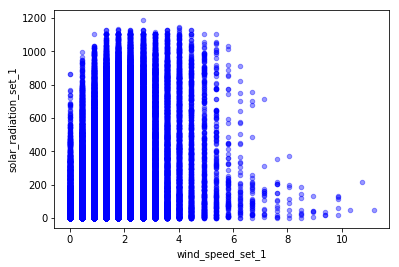

In [45]:
normalizing.plot(kind='scatter', x='wind_speed_set_1', y='solar_radiation_set_1', alpha=0.4, color='b')

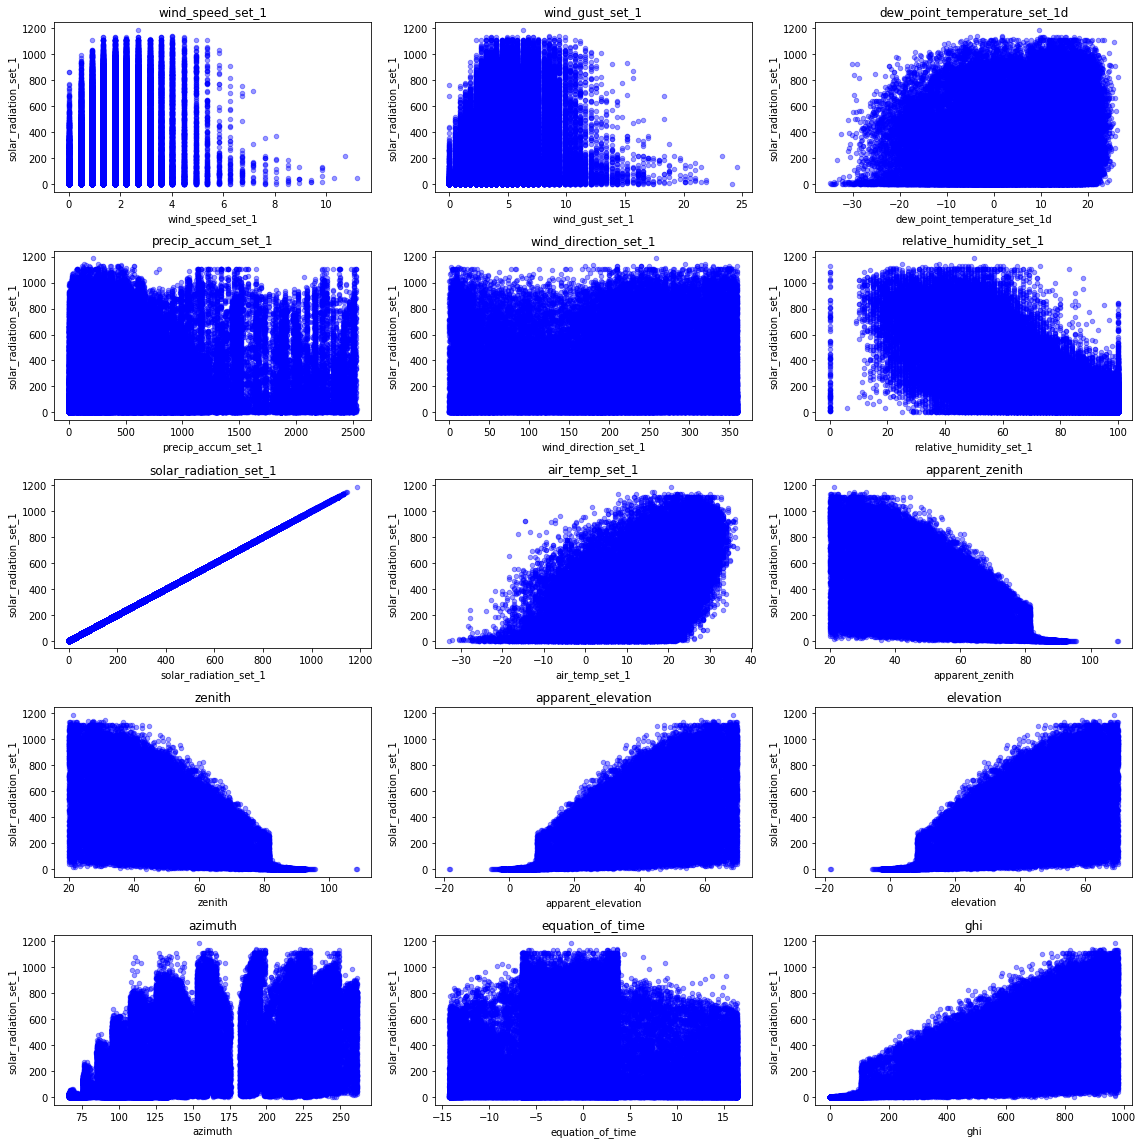

In [46]:
fig, axes = plt.subplots(nrows=(normalizing.shape[1] // 3), ncols=3, figsize=(16,16))

categoricals = [column for column in normalizing.columns if column != 'Id']

for col, ax in zip(categoricals, axes.flatten()):
    normalizing.plot(kind='scatter', x=col, y='solar_radiation_set_1', ax=ax, alpha=0.4, color='b')
    ax.set_title(col)
    
fig.tight_layout()

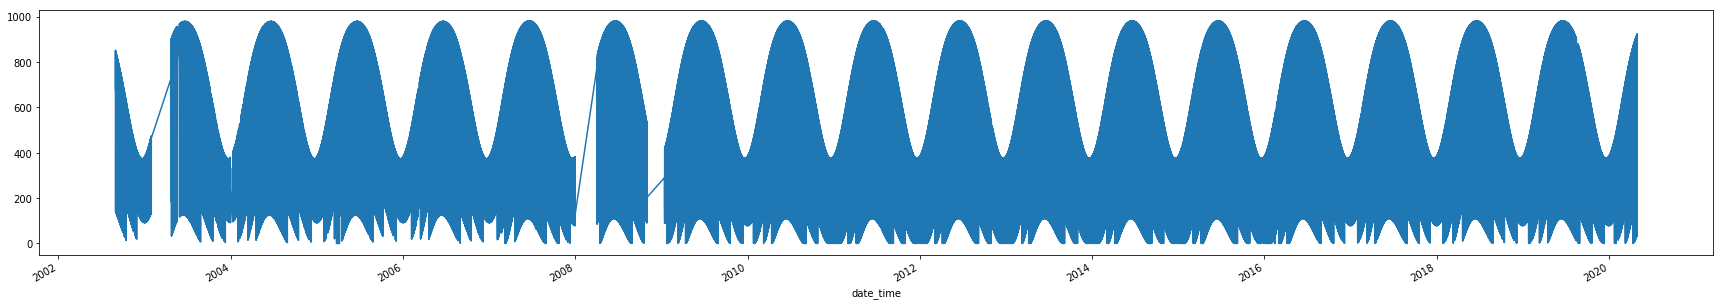

In [47]:
normalizing['ghi'].plot(figsize=(30,5))

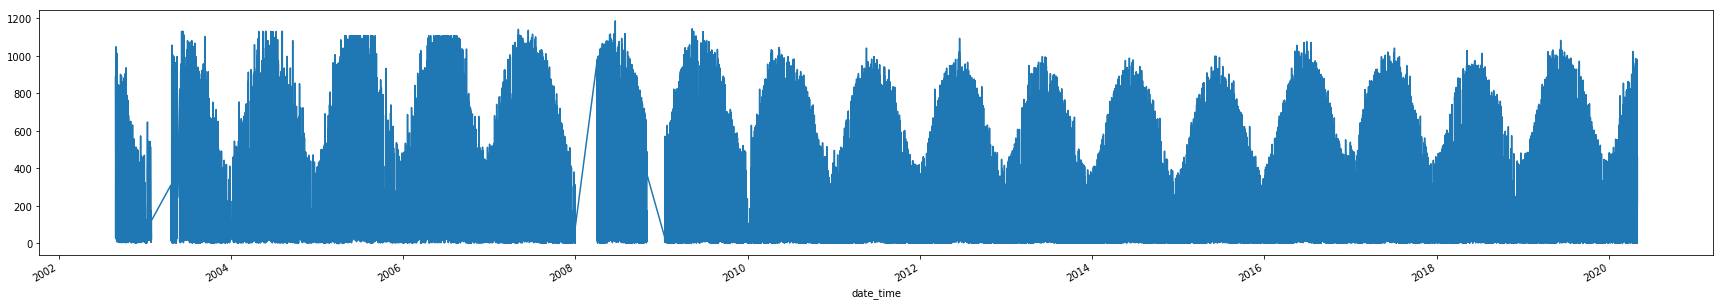

In [48]:
normalizing['solar_radiation_set_1'].plot(figsize=(30,5))

In [49]:
for_plotting = normalizing.loc['2019-01-01':'2020-01-01']

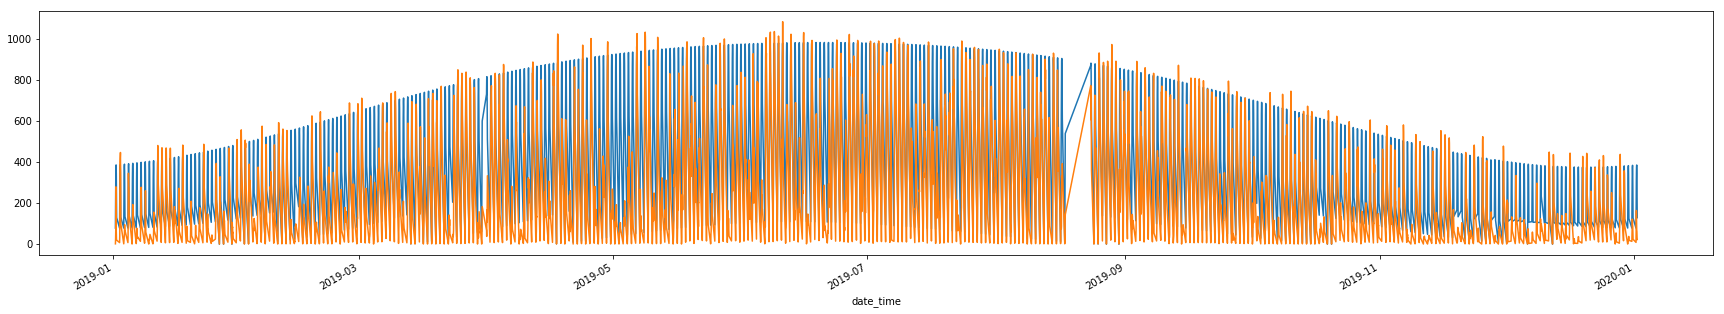

In [50]:
for_plotting['ghi'].plot(figsize=(30,5))
for_plotting['solar_radiation_set_1'].plot(figsize=(30,5))

In [51]:
# Creating exceedance feature

normalizing['cs_exceed'] = 0
ct = 0
for index, row in normalizing.iterrows():
    if row['solar_radiation_set_1'] > row['ghi']:
        normalizing.loc[index: ,'cs_exceed'] = 1
        ct += 1
    else:
        normalizing.loc[index: ,'cs_exceed'] = 0
print(ct)

C:\Users\Mark\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Mark\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


8493


# Normalize Features

In [52]:
to_be_loged = ['solar_radiation_set_1', 'precip_accum_set_1', 'relative_humidity_set_1'] #, 'dew_point_temperature_set_1d'

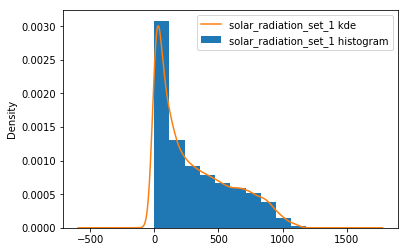

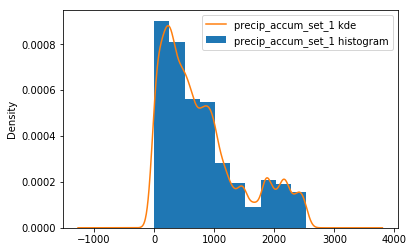

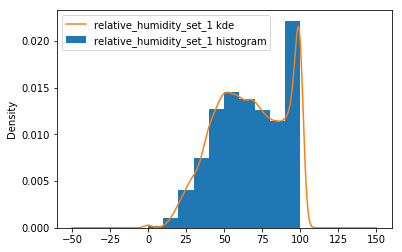

In [53]:

for feat in to_be_loged:
    normalizing[feat].plot.hist(density=True, label = feat+' histogram')
    normalizing[feat].plot.kde(label =feat+' kde')
    plt.legend()
    plt.show()

In [54]:
logged = normalizing.loc[:,to_be_loged] 

In [55]:
## Pro Moves ##

# fig, axes = plt.subplots(nrows=(logged.shape[1] // 2), ncols=2, figsize=(8,4))

# categoricals = [column for column in logged.columns if column != 'Id']

# for col, ax in zip(categoricals, axes.flatten()):
#     ax.hist(logged[col], bins='auto')
#     ax.set_title(col)
    
# fig.tight_layout()

In [56]:
# logging select variables
# todo for station in station_list do

for feat in logged:
    logged[feat] = np.log(logged[feat]) 

logged.isna().sum()

C:\Users\Mark\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


solar_radiation_set_1      0
precip_accum_set_1         0
relative_humidity_set_1    0
dtype: int64

In [57]:
# for feat in logged:
#     logged[feat].plot.hist(density=True, label = feat+' histogram', range=(-3,  10))
#     plt.legend()
#     plt.show()

In [58]:
for feat in logged:
    normalizing[f'{feat}_log'] = logged[feat]
    normalizing.drop([feat], axis = 1, inplace = True)

C:\Users\Mark\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Mark\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [59]:
normalizing.columns

Index(['wind_speed_set_1', 'wind_gust_set_1', 'dew_point_temperature_set_1d',
       'wind_direction_set_1', 'air_temp_set_1', 'apparent_zenith', 'zenith',
       'apparent_elevation', 'elevation', 'azimuth', 'equation_of_time', 'ghi',
       'dni', 'dhi', 'cs_exceed', 'solar_radiation_set_1_log',
       'precip_accum_set_1_log', 'relative_humidity_set_1_log'],
      dtype='object')

In [60]:
import pandas as pd

In [61]:
# For now, while this index has two values, binning is unessisary
# can add wind direction and other 

categorical_features = ['cs_exceed', 'wind_speed_set_1'] # wind direction 
cat_dict = {}
def bining(series):
    bins = list(series.unique())
    bins = [-1] + bins
    bins.sort()
    return bins
for feat in categorical_features:
    cat = pd.cut(normalizing[feat], bining(normalizing[feat]))
    cat = cat.cat.as_unordered()
    cat = pd.get_dummies(cat, prefix=feat, drop_first=True)
    
    normalizing = pd.concat([normalizing, cat])

#     normalizing.drop(feat, axis = 1, inplace = True)

# data = pd.concat([data, cyl_dummies, yr_dummies, orig_dummies], axis=1)
# data.head()

normalizing.columns

C:\Users\Mark\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\reshape\tile.py:254: RuntimeWarning: invalid value encountered in less
  if (np.diff(bins.astype("float64")) < 0).any():


ValueError: missing values must be missing in the same location both left and right sides

In [ ]:
import numpy as np
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

In [ ]:
'''
def make_dummies(series):
    processing = pd.cut(categories.series, bining(categories.series))
    processing = processing.cat.as_unordered()
    processed = pd.get_dummies(processing, prefix=str(series), drop_first=True)
    return processed
'''

beds = pd.cut(categories.bedrooms, bining(categories.bedrooms))
beds = beds.cat.as_unordered()
beds = pd.get_dummies(beds, prefix='beds', drop_first=True)
spread_categories = beds

spread_categories.columns

In [ ]:
view data

In [ ]:
corr for each value

In [ ]:
from statsmodels.formula.api import ols